In [1]:
from glob import glob
import warnings

warnings.filterwarnings("ignore")

In [2]:
all_systems = glob("../data/combined/*.fits")
all_systems[:4]

['../data/combined\\kplr001026032.fits',
 '../data/combined\\kplr001026957.fits',
 '../data/combined\\kplr001161345.fits',
 '../data/combined\\kplr001432214.fits']

In [3]:
from pipeline.preproc import read
df = read("../data/combined/kplr006545018.fits") #  kplr001433410.fits
df

,time,flux
0,131.511994,40133.195312
1,131.532429,40131.621094
2,131.552863,40149.851562
3,131.573298,40149.464844
4,131.593732,40135.363281
...,...,...
69297,1590.919192,38497.832031
69298,1590.939626,38502.941406
69299,1590.960061,38485.007812
69300,1590.980495,38484.132812


<AxesSubplot:title={'center':'Light Curve'}, xlabel='Time (days)', ylabel='Flux (electrons/second)'>

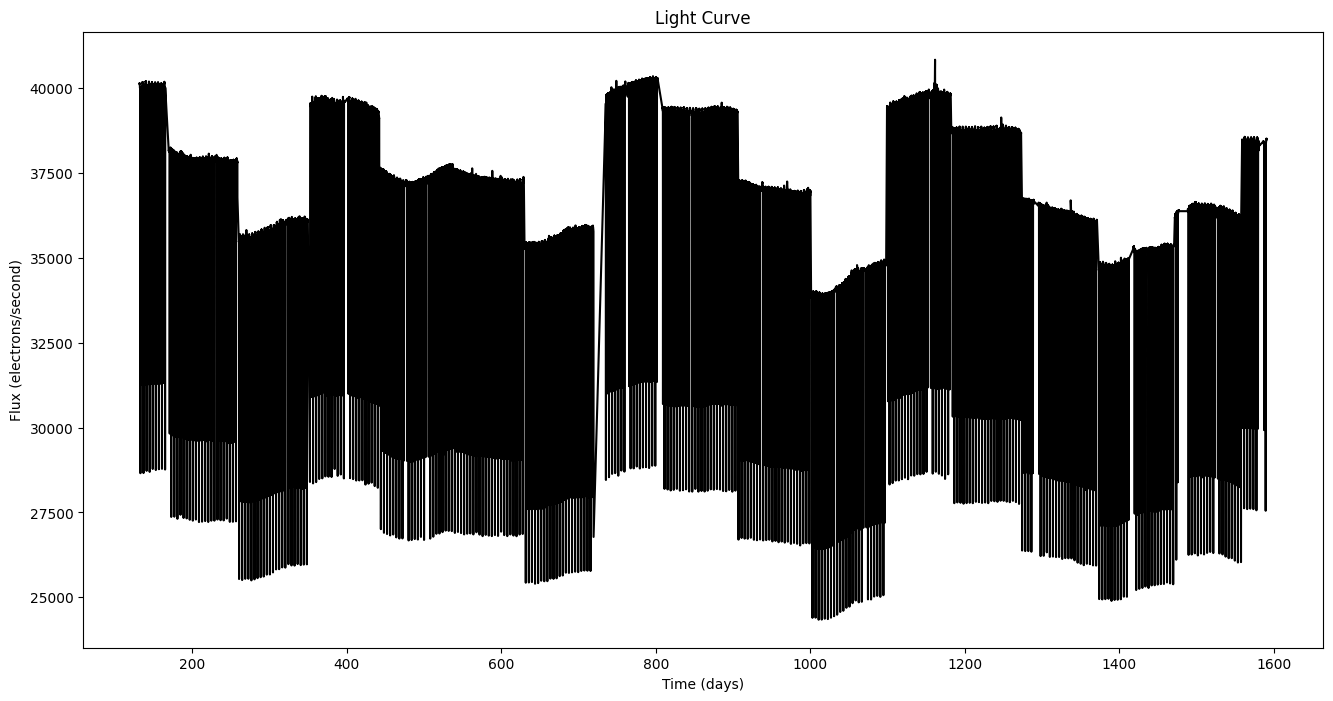

In [4]:
df.plot(
    x="time", y="flux", color="black",
    title="Light Curve", xlabel = 'Time (days)', ylabel = 'Flux (electrons/second)',
    figsize=(16, 8), legend=False
)

<AxesSubplot:title={'center':'Detrended Light Curve'}, xlabel='Time (days)', ylabel='Detrended Flux (electrons/second)'>

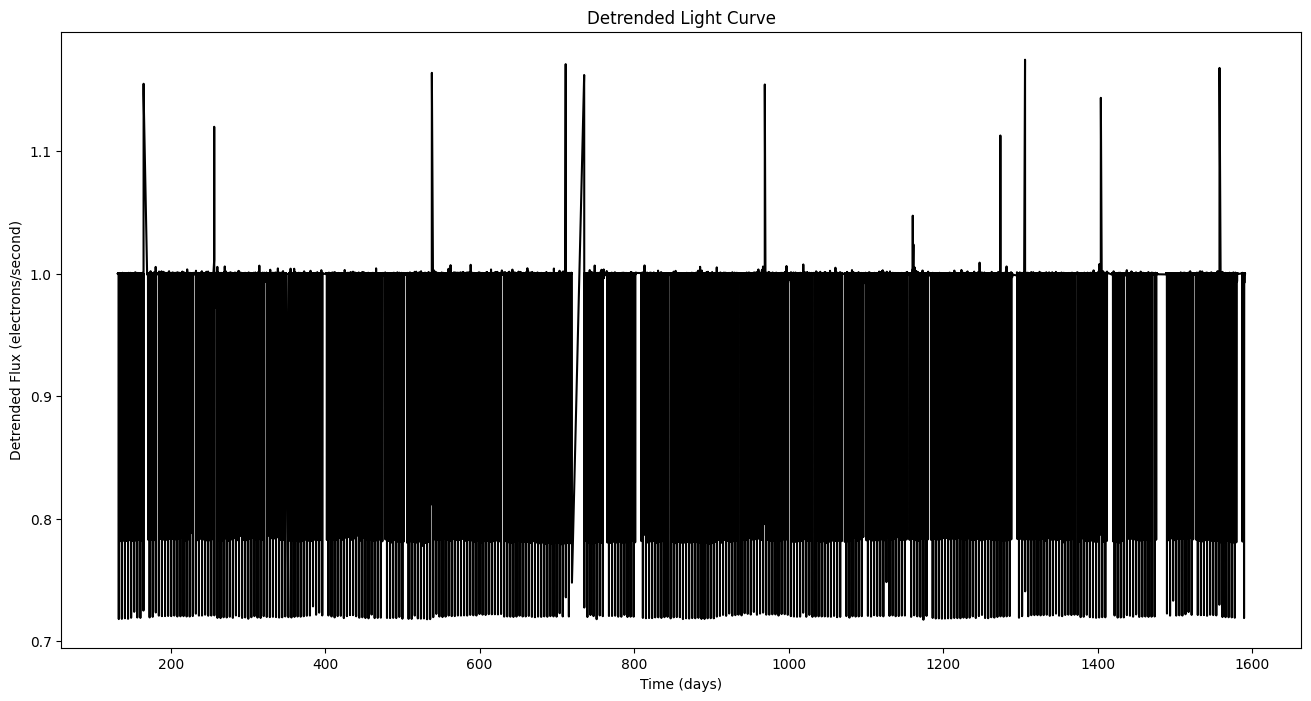

In [5]:
from pipeline.preproc import detrend
df = detrend(df)

df.plot(
    x="time", y="flux", color="black",
    title="Detrended Light Curve", xlabel = 'Time (days)', ylabel = 'Detrended Flux (electrons/second)',
    figsize=(16, 8), legend=False
)

In [6]:
from pipeline.eclipses import find_eclipse_timings

timings = find_eclipse_timings(df)
timings

,time,duration,delta
0,1.000000,0.183911,2.002586
1,3.002586,0.183911,1.982151
2,4.984736,0.183911,2.002585
3,6.987321,0.183911,2.002584
4,8.989905,0.183911,2.002583
...,...,...,...
674,1441.914029,0.183909,2.002569
675,1443.916598,0.183909,1.982137
676,1445.898734,0.183910,2.002573
677,1447.901307,0.183910,7.989864


<AxesSubplot:title={'center':'Eclipse Timing Variations'}, xlabel='Time (days)', ylabel='Change in Eclipse Time'>

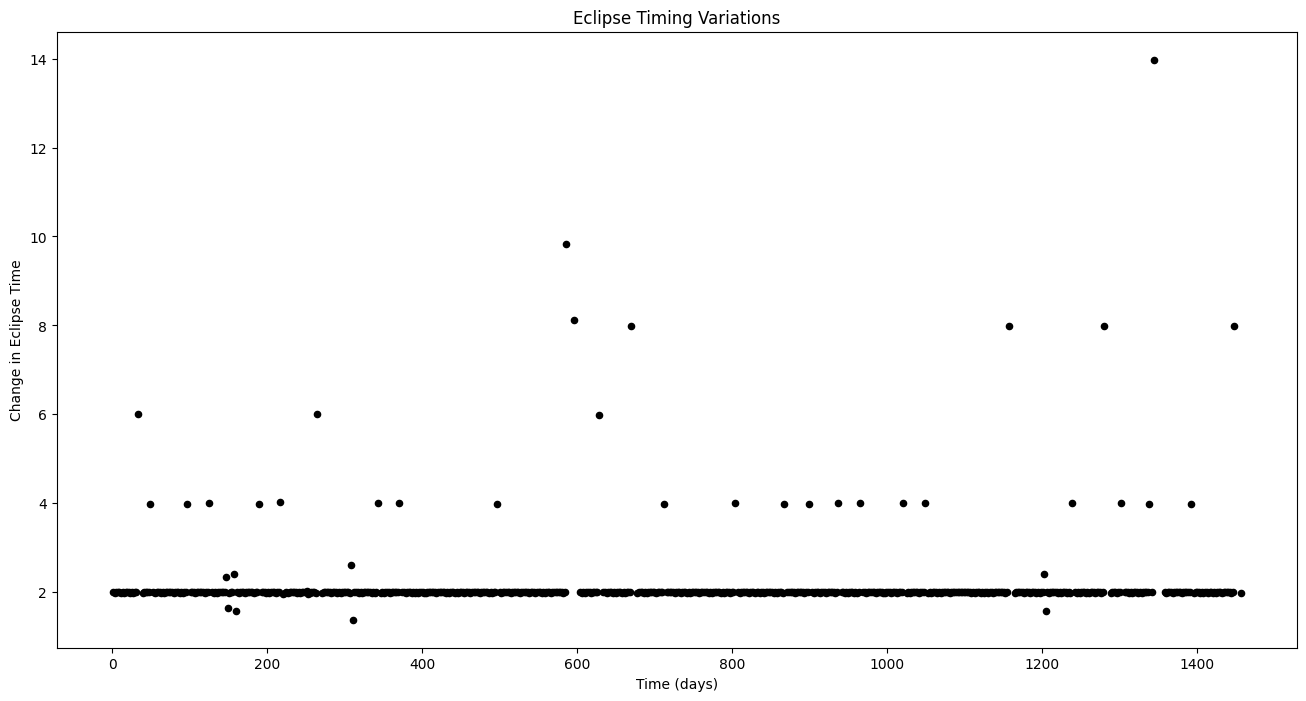

In [7]:
timings.plot.scatter(
    x = "time", y="delta", color="black",
    title="Eclipse Timing Variations", xlabel = 'Time (days)', ylabel = 'Change in Eclipse Time',
    figsize=(16, 8), legend=False
)

In [8]:
from pipeline.filter import complete_filter
timings, diagnostics = complete_filter(timings, return_diagnostics=True)
timings

,time,duration,delta
0,1.000000,0.183911,2.002586
1,3.002586,0.183911,1.982151
2,4.984736,0.183911,2.002585
3,6.987321,0.183911,2.002584
4,8.989905,0.183911,2.002583
...,...,...,...
634,1439.911461,0.183909,2.002567
635,1441.914029,0.183909,2.002569
636,1443.916598,0.183909,1.982137
637,1445.898734,0.183910,2.002573


In [9]:
diagnostics

(3, 37, False, 0)

<AxesSubplot:title={'center':'Eclipse Timing Variations'}, xlabel='Time (days)', ylabel='Change in Eclipse Time'>

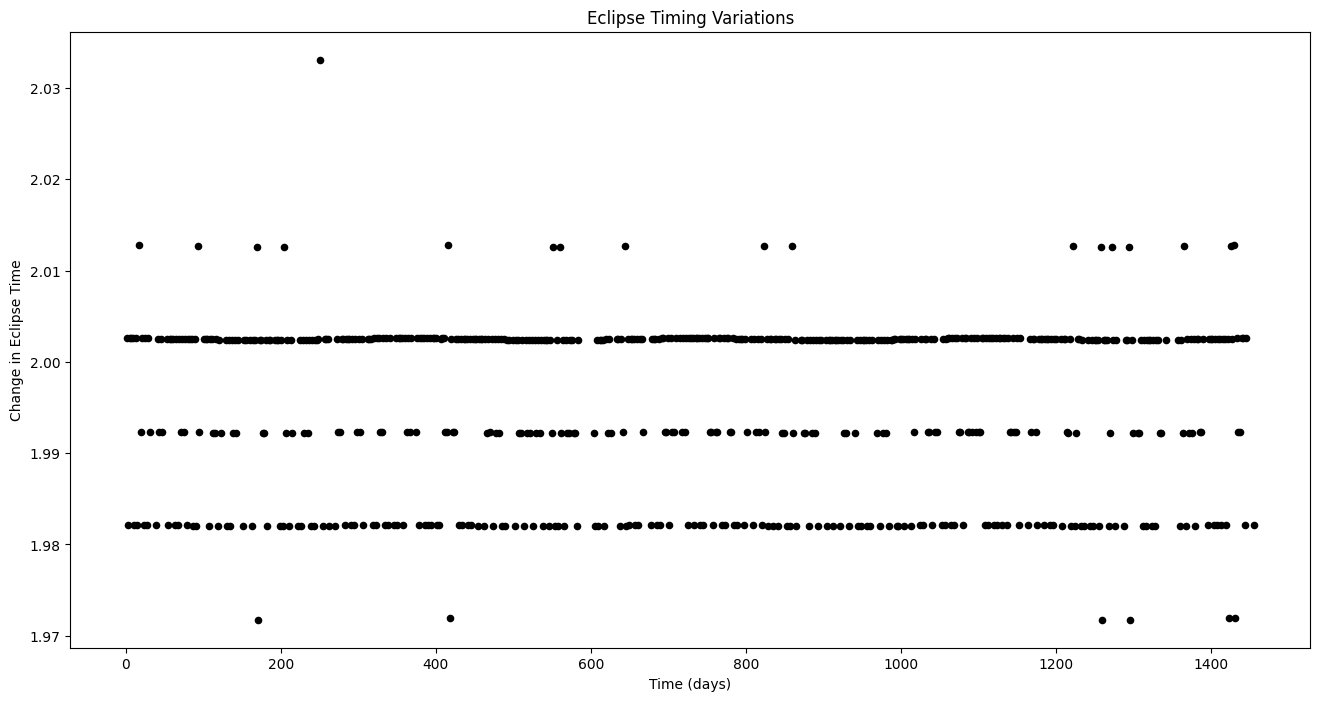

In [10]:
timings.plot.scatter(
    x = "time", y="delta", color="black",
    title="Eclipse Timing Variations", xlabel = 'Time (days)', ylabel = 'Change in Eclipse Time',
    figsize=(16, 8), legend=False
)

In [11]:
from pipeline.oc import get_oc
oc, period = get_oc(timings)
oc

,time,duration,delta,residuals
0,1.000000,0.183911,2.002586,0.000000
1,3.002586,0.183911,1.982151,0.000383
2,4.984736,0.183911,2.002585,-0.019669
3,6.987321,0.183911,2.002584,-0.019286
4,8.989905,0.183911,2.002583,-0.018905
...,...,...,...,...
634,1439.911461,0.183909,2.002567,-0.672048
635,1441.914029,0.183909,2.002569,-0.671683
636,1443.916598,0.183909,1.982137,-0.671316
637,1445.898734,0.183910,2.002573,-0.691381


In [12]:
period

2.002202376547252

<AxesSubplot:title={'center':'O-C Curve'}, xlabel='Time (days)', ylabel='Residuals'>

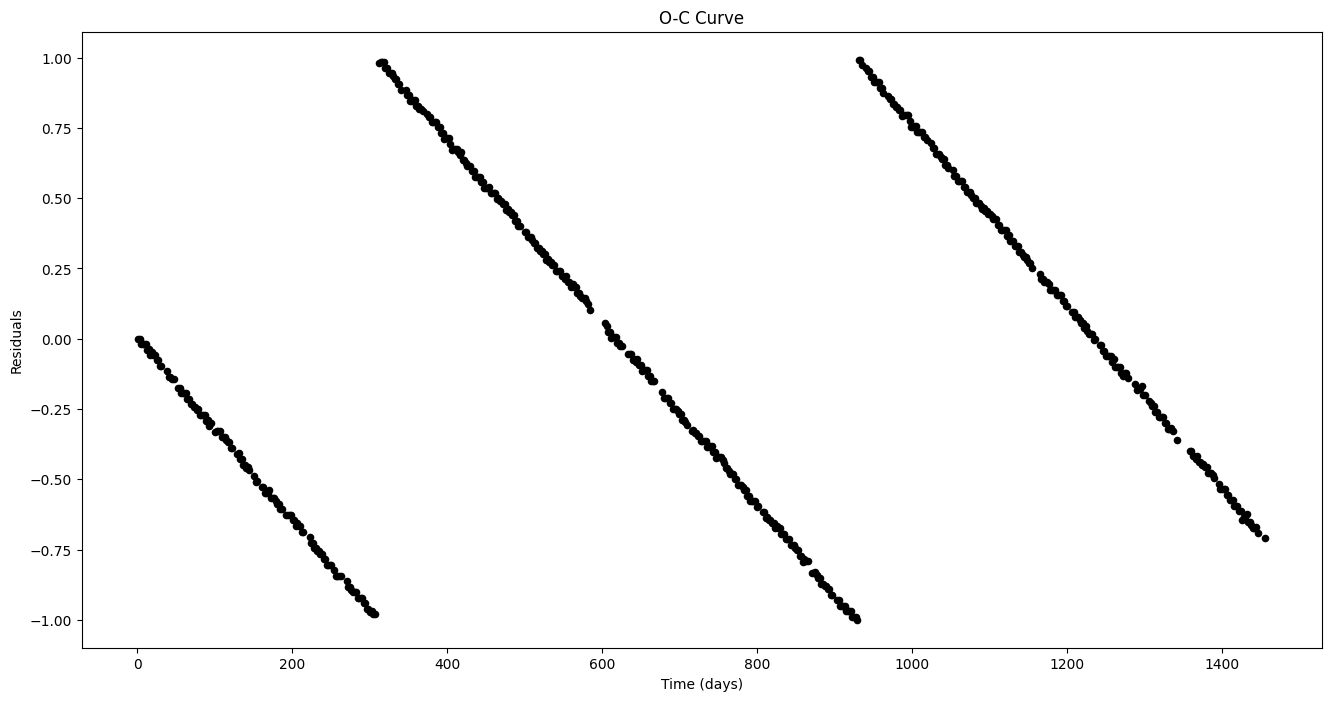

In [13]:
oc.plot.scatter(
    x = "time", y="residuals", color="black",
    title="O-C Curve", xlabel = 'Time (days)', ylabel = 'Residuals',
    figsize=(16, 8), legend=False
)

In [14]:
from pipeline.periodic import remove_periodic_noise
oc = remove_periodic_noise(oc)
oc

,time,duration,delta,residuals
0,1.000000,0.183911,2.002586,-0.288796
1,3.002586,0.183911,1.982151,-0.210071
2,4.984736,0.183911,2.002585,-0.133110
3,6.987321,0.183911,2.002584,-0.061407
4,8.989905,0.183911,2.002583,0.001800
...,...,...,...,...
634,1439.911461,0.183909,2.002567,-0.602225
635,1441.914029,0.183909,2.002569,-0.557745
636,1443.916598,0.183909,1.982137,-0.502600
637,1445.898734,0.183910,2.002573,-0.437971


<AxesSubplot:title={'center':'(Culled) O-C Curve'}, xlabel='Time (days)', ylabel='(Culled) Residuals'>

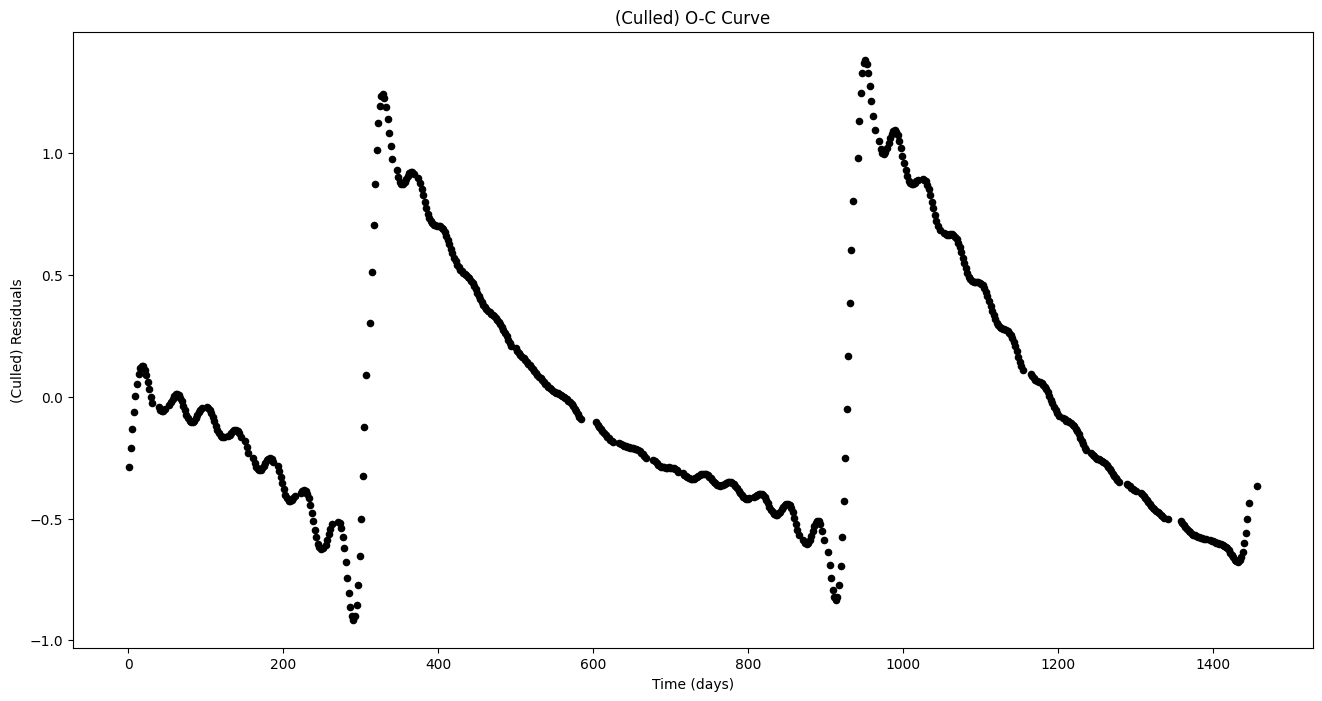

In [15]:
oc.plot.scatter(
    x = "time", y="residuals", color="black",
    title="(Culled) O-C Curve", xlabel = 'Time (days)', ylabel = '(Culled) Residuals',
    figsize=(16, 8), legend=False
)

In [16]:
from pipeline.core import ideal_pipeline

oc, period = ideal_pipeline("../data/combined/kplr006545018.fits")
oc

,time,duration,delta,residuals
0,1.000000,0.183911,2.002586,-0.284223
1,3.002586,0.183911,1.982151,-0.208967
2,4.984736,0.183911,2.002585,-0.135457
3,6.987321,0.183911,2.002584,-0.066714
4,8.989905,0.183911,2.002583,-0.005558
...,...,...,...,...
636,1439.911461,0.183909,2.002567,-0.593323
637,1441.914029,0.183909,2.002569,-0.547290
638,1443.916598,0.183909,1.982137,-0.491856
639,1445.898734,0.183910,2.002573,-0.428230


<AxesSubplot:title={'center':'O-C Curve'}, xlabel='Time (days)', ylabel='Residuals'>

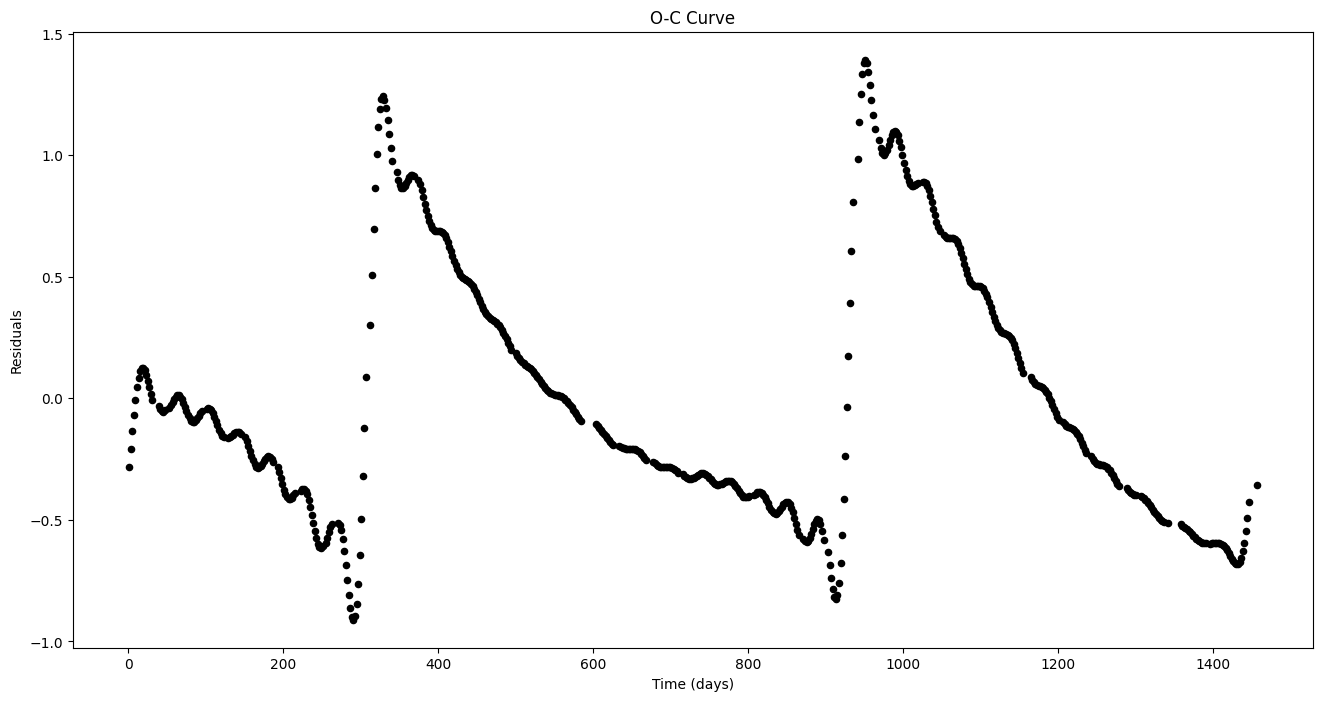

In [17]:
oc.plot.scatter(
    x = "time", y="residuals", color="black",
    title="O-C Curve", xlabel = 'Time (days)', ylabel = 'Residuals',
    figsize=(16, 8), legend=False
)